In [4]:
import pandas as pd

## Practice

In [5]:
# Read in the practice sheet in experiment.xlsx into a pandas df
df = pd.read_excel("experiment.xlsx", sheet_name="practice") 

# Make sure that item and no are integers
df['item'] = pd.to_numeric(df['item'], errors='coerce').astype('Int64')
df['no'] = pd.to_numeric(df['no'], errors='coerce').astype('Int64')

# Drop rows where 'item' is empty or not an integer
df = df[pd.to_numeric(df["item"], errors="coerce").notna()]

# Drop these columns: image_pair_left	image_pair_right	vpx	definite	uncountable	remark
df = df.drop(columns=['image_pair_left', 'image_pair_right', 'vpx', 'definite', 'uncountable', 'remark'], errors='ignore')

# If 'cb' column is 'y', then switch the values of the left and right column.
df.loc[df['cb'] == 'y', ['left', 'right']] = df.loc[df['cb'] == 'y', ['right', 'left']].values

# Randomize the order of the rows in a reproducible way
# df = df.sample(frac=1, random_state=1349).reset_index(drop=True)

# Reset index
df = df.reset_index(drop=True)

# Save to CSV
csv_file = "practice.csv"
df.to_csv(csv_file, index=False)

print(f"Filtered data saved to {csv_file}!")
df


Filtered data saved to practice.csv!


,no,item,condition,group,cb,r1,r2,r3,r4,r5,r6,r7,left,right,question
0,990,0,practice,NaN,n,Ez,"egy példamondat,",kérlek,válaszd,majd,az A betűs,képet.,A,B,NaN
1,991,0,practice,NaN,y,Ez is,"csak gyakorlás,",kérlek,majd,válaszd,a C betűs,képet.,D,C,NaN
2,992,0,practice,NaN,n,Itt,pedig,válaszd,azt a képet,amelyik,balodalt,van.,E,F,Melyik van a bal oldalon?


## Live Experiment

In [6]:
# Read in experiment.xlsx into a pandas df
import pandas as pd

df = pd.read_excel("experiment.xlsx")

# Make sure that item and no are integers
df['item'] = pd.to_numeric(df['item'], errors='coerce').astype('Int64')
df['no'] = pd.to_numeric(df['no'], errors='coerce').astype('Int64')

# Drop rows where 'item' is empty or not an integer
df = df[pd.to_numeric(df["item"], errors="coerce").notna()]

# Drop these columns: image_pair_left	image_pair_right	vpx	definite	uncountable	remark
df = df.drop(columns=['image_pair_left', 'image_pair_right', 'vpx', 'definite', 'uncountable', 'remark'], errors='ignore')

# If 'cb' column is 'y', then switch the values of the left and right column.
df.loc[df['cb'] == 'y', ['left', 'right']] = df.loc[df['cb'] == 'y', ['right', 'left']].values

# Randomize the order of the rows in a reproducible way
df = df.sample(frac=1, random_state=1349).reset_index(drop=True)

# Reset index
df = df.reset_index(drop=True)

# Save to CSV
csv_file = "experiment_data.csv"
df.to_csv(csv_file, index=False)

print(f"Filtered data saved to {csv_file}!")
df


Filtered data saved to experiment_data.csv!


,no,item,condition,group,cb,r1,r2,r3,r4,r5,r6,r7,left,right,question
0,8,3,focus,a,y,Ami,a bútorokat,"illeti,",az asztalos,tegnap,egy könyvespolcot,készített.,3b,3a,NaN
1,41,14,focus,c,n,Ami,a konyhát,"illeti,",a szerelő,múltkor,a hűtőt,üzemelte be.,14a,14b,NaN
2,32,11,focus,c,y,Ami,a járműveket,"illeti,",a turisták,a hétvégén,egy robogót,béreltek ki.,11b,11a,NaN
3,113,33,attention-check,c,n,Ez a mondat,"nem igazi,",úgyhogy,kérlek,válaszd,NaN,a burgonyát.,burgonya,paradicsom,NaN
4,99,30,self-directed,c,n,A tanár,"nem bánta,",hogy,a diák,felajánlotta,NaN,a segítségét.,tanár,diák,Kinek a segítségéről van szó?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,39,13,contrastive,c,n,Múltkor,az állatkertben,a gyerekek,többek,között,az elefántot,nézték meg.,13a,13b,NaN
118,67,22,self-directed,a,n,A vezérigazgató,"sejtette,",hogy,a menedzser,elherdálta,NaN,a vagyonát.,vezérigazgató,menedzser,Kinek a vagyonáról van szó?
119,37,13,exclusive,a,n,Ami,az állatokat,"illeti,",a gyerekek,csak,az elefántot,nézték meg.,13a,13b,NaN
120,18,6,contrastive,b,y,Hallottam,hogy,Éva,többek,között,a tulipánt,szereti.,6b,6a,NaN


In [7]:
# Show me only rows of group a
df_a = df[df['group'] == 'a'].reset_index(drop=True)
df_b = df[df['group'] == 'b'].reset_index(drop=True)
df_c = df[df['group'] == 'c'].reset_index(drop=True)
df_a

,no,item,condition,group,cb,r1,r2,r3,r4,r5,r6,r7,left,right,question
0,8,3,focus,a,y,Ami,a bútorokat,"illeti,",az asztalos,tegnap,egy könyvespolcot,készített.,3b,3a,NaN
1,51,17,contrastive,a,n,Általában,a műhelyben,ez a szabó,többek,között,ingeket,foltozott be.,17a,17b,NaN
2,10,4,exclusive,a,y,Ami,a harci eszközöket,"illeti,",a katonaság,csak,a helikoptert,tesztelte.,4b,4a,NaN
3,120,36,attention-check,a,y,Figyelsz?,"Ha igen,",akkor,melyik,a nap,utolsó,étkezése?,reggeli,vacsora,Melyiket választod?
4,109,32,self-directed-x,a,n,A politikus,"meglepődött,",hogy,az újságíró,megbánta,NaN,a nyilatkozatát.,politikus,újságíró,Kinek a nyilatkozatáról van szó?
5,70,22,other-directed-x,a,y,A menedzser,"sejtette,",hogy,a vezérigazgató,vágyott,NaN,a vagyonára.,vezérigazgató,menedzser,Kinek a vagyonáról van szó?
6,46,16,exclusive,a,y,Ami,az ebédet,"illeti,",a nagyi,csak,levest,tálalt fel.,16b,16a,NaN
7,79,25,self-directed,a,n,Az ügyész,"számított rá,",hogy,a tudós,felolvassa,NaN,a vallomását.,ügyész,tudós,Kinek a vallomásáról van szó?
8,103,31,other-directed-x,a,n,A művész,"mondta,",hogy,az üzletember,büszke volt,NaN,a kiállítására.,művész,üzletember,Kinek a kiállításáról van szó?
9,64,21,other-directed,a,y,A tűzoltó,"hallotta,",hogy,az orvos,megfontolta,NaN,a véleményét.,orvos,tűzoltó,Kinek a véleményéről van szó?


Unique conditions (normalized): ['attention_check', 'contrastive', 'exclusive', 'focus', 'other_directed', 'other_directed_x', 'self_directed', 'self_directed_x']


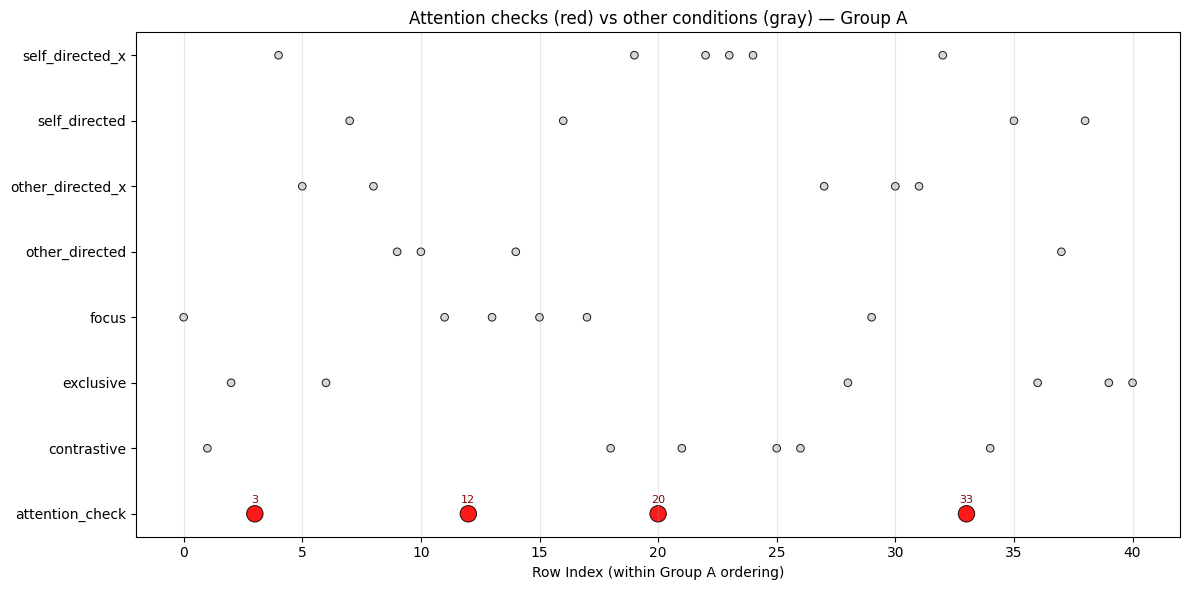

In [8]:
# Visualize for me that in group a, where are the attention checks in the row order compared to other conditions
import matplotlib.pyplot as plt
import numpy as np

# Normalize condition strings to avoid mismatches (strip, lower, replace spaces/hyphens with underscore)
df_a = df_a.copy()
df_a['condition_norm'] = (
    df_a['condition'].astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'[\s-]+', '_', regex=True)
)

# Debug: show unique normalized conditions so we can see why an exact match may have failed
print("Unique conditions (normalized):", sorted(df_a['condition_norm'].unique()))

plt.figure(figsize=(12, 6))
# Convert normalized condition to categorical codes so we can plot on a numeric y-axis with meaningful labels
conds = pd.Categorical(df_a['condition_norm'])
y_vals = conds.codes

# styles: attention checks stand out (big red markers with black edge); others are small light-gray markers
is_ac = df_a['condition_norm'] == 'attention_check'
colors = np.where(is_ac, 'red', 'lightgray')
sizes = np.where(is_ac, 140, 30)
edgecolors = np.where(is_ac, 'black', 'none')

plt.scatter(df_a.index, y_vals, c=colors, s=sizes, alpha=0.9, edgecolors=edgecolors, linewidths=0.7)

# Annotate attention checks with their row index for quick identification
ac_indices = df_a.index[is_ac]
for idx in ac_indices:
    pos = df_a.index.get_loc(idx)
    plt.annotate(str(idx), (idx, y_vals[pos]), xytext=(0, 8), textcoords='offset points', ha='center', fontsize=8, color='darkred')

# Y ticks show the condition names
plt.yticks(np.arange(len(conds.categories)), conds.categories)
plt.xlabel('Row Index (within Group A ordering)')
plt.title('Attention checks (red) vs other conditions (gray) — Group A')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig("attention_checks_group_a.png")
plt.show()


Unique conditions (normalized): ['attention_check', 'contrastive', 'exclusive', 'focus', 'other_directed', 'other_directed_x', 'self_directed', 'self_directed_x']


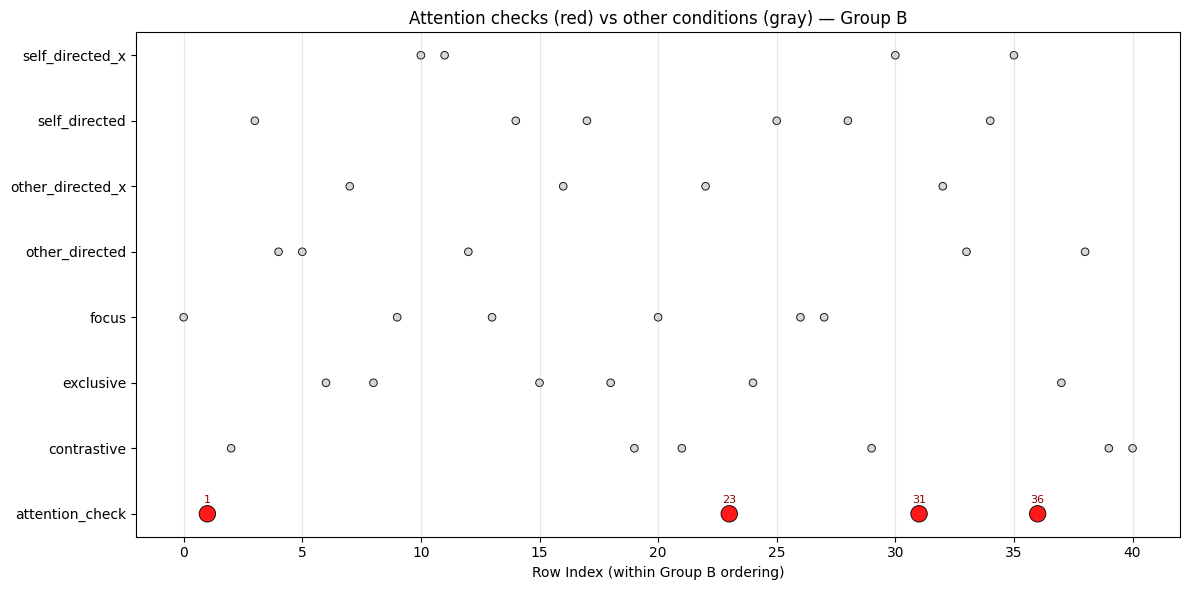

In [9]:
# Visualize for me that in group a, where are the attention checks in the row order compared to other conditions
import matplotlib.pyplot as plt
import numpy as np

# Normalize condition strings to avoid mismatches (strip, lower, replace spaces/hyphens with underscore)
df_b = df_b.copy()
df_b['condition_norm'] = (
    df_b['condition'].astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'[\s-]+', '_', regex=True)
)

# Debug: show unique normalized conditions so we can see why an exact match may have failed
print("Unique conditions (normalized):", sorted(df_b['condition_norm'].unique()))

plt.figure(figsize=(12, 6))
# Convert normalized condition to categorical codes so we can plot on a numeric y-axis with meaningful labels
conds = pd.Categorical(df_b['condition_norm'])
y_vals = conds.codes

# styles: attention checks stand out (big red markers with black edge); others are small light-gray markers
is_ac = df_b['condition_norm'] == 'attention_check'
colors = np.where(is_ac, 'red', 'lightgray')
sizes = np.where(is_ac, 140, 30)
edgecolors = np.where(is_ac, 'black', 'none')

plt.scatter(df_b.index, y_vals, c=colors, s=sizes, alpha=0.9, edgecolors=edgecolors, linewidths=0.7)

# Annotate attention checks with their row index for quick identification
ac_indices = df_b.index[is_ac]
for idx in ac_indices:
    pos = df_b.index.get_loc(idx)
    plt.annotate(str(idx), (idx, y_vals[pos]), xytext=(0, 8), textcoords='offset points', ha='center', fontsize=8, color='darkred')

# Y ticks show the condition names
plt.yticks(np.arange(len(conds.categories)), conds.categories)
plt.xlabel('Row Index (within Group B ordering)')
plt.title('Attention checks (red) vs other conditions (gray) — Group B')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig("attention_checks_group_b.png")
plt.show()



Unique conditions (normalized): ['attention_check', 'contrastive', 'exclusive', 'focus', 'other_directed', 'other_directed_x', 'self_directed', 'self_directed_x']


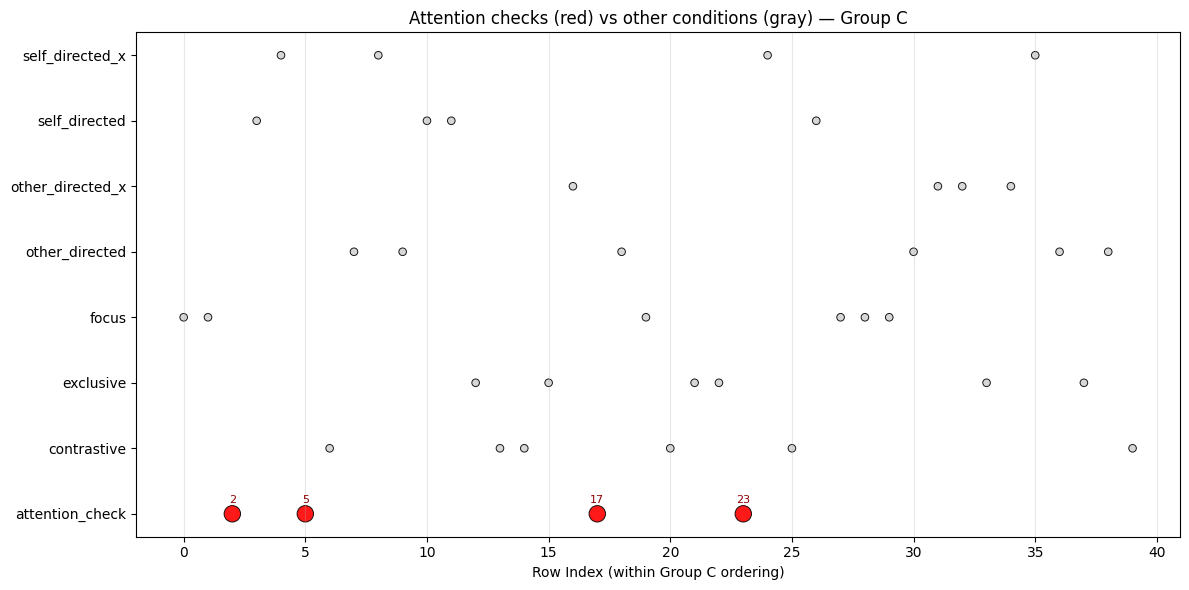

In [10]:
# Visualize for me that in group a, where are the attention checks in the row order compared to other conditions
import matplotlib.pyplot as plt
import numpy as np

# Normalize condition strings to avoid mismatches (strip, lower, replace spaces/hyphens with underscore)
df_c = df_c.copy()
df_c['condition_norm'] = (
    df_c['condition'].astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'[\s-]+', '_', regex=True)
)

# Debug: show unique normalized conditions so we can see why an exact match may have failed
print("Unique conditions (normalized):", sorted(df_c['condition_norm'].unique()))

plt.figure(figsize=(12, 6))
# Convert normalized condition to categorical codes so we can plot on a numeric y-axis with meaningful labels
conds = pd.Categorical(df_c['condition_norm'])
y_vals = conds.codes

# styles: attention checks stand out (big red markers with black edge); others are small light-gray markers
is_ac = df_c['condition_norm'] == 'attention_check'
colors = np.where(is_ac, 'red', 'lightgray')
sizes = np.where(is_ac, 140, 30)
edgecolors = np.where(is_ac, 'black', 'none')

plt.scatter(df_c.index, y_vals, c=colors, s=sizes, alpha=0.9, edgecolors=edgecolors, linewidths=0.7)

# Annotate attention checks with their row index for quick identification
ac_indices = df_c.index[is_ac]
for idx in ac_indices:
    pos = df_c.index.get_loc(idx)
    plt.annotate(str(idx), (idx, y_vals[pos]), xytext=(0, 8), textcoords='offset points', ha='center', fontsize=8, color='darkred')

# Y ticks show the condition names
plt.yticks(np.arange(len(conds.categories)), conds.categories)
plt.xlabel('Row Index (within Group C ordering)')
plt.title('Attention checks (red) vs other conditions (gray) — Group C')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig("attention_checks_group_c.png")
plt.show()